In [1]:
import statistics 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import accuracy_score
import numpy as np


# part one: finding and loading the data 
sp_data=pd.read_csv("expenses.csv")
sp_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
x=sp_data.drop(columns=['sex','smoker','region'])
x

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [5]:
z = sp_data['age'].fillna(0)

avg_open = statistics.mean(z) 
avg_open


39.20702541106129

In [6]:
hmean = statistics.harmonic_mean(z)
hmean

33.73383502962173

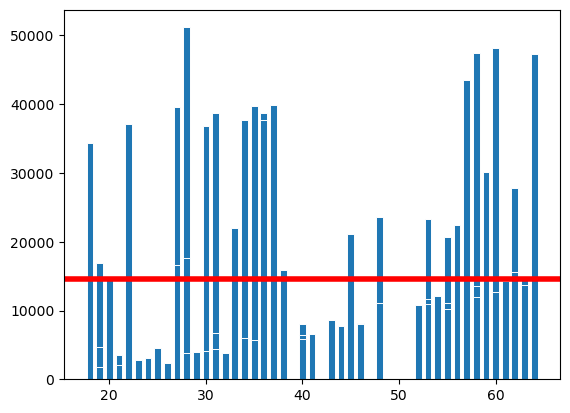

In [31]:
newDf=sp_data.iloc[:100]
newDf
#create scatter plot
plt.bar(newDf.age,newDf.charges, width=0.7, edgecolor="white", linewidth=0.7)

#add horizontal line at mean value of y
plt.axhline(y=np.nanmean(newDf.charges),linewidth=4, color='r')

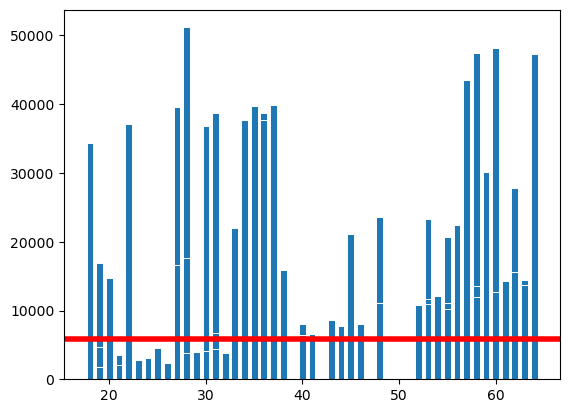

In [48]:
newDf=sp_data.iloc[:100]
newDf
#create scatter plot
plt.bar(newDf.age,newDf.charges, width=0.7, edgecolor="white", linewidth=0.7)

#add horizontal line at mean value of y
plt.axhline(statistics.harmonic_mean(newDf.charges),linewidth=4, color='r')

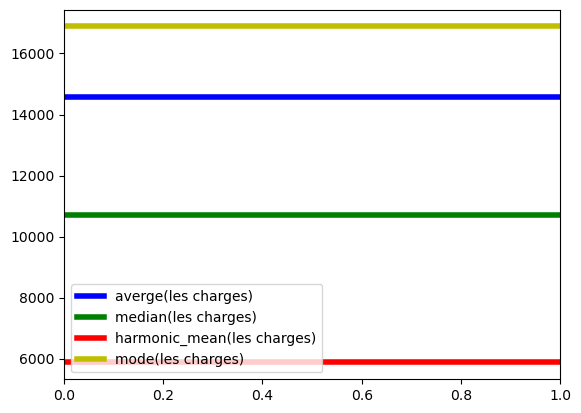

In [55]:
plt.axhline(np.nanmean(newDf.charges),linewidth=4, color='b' ,label='averge(les charges)')
plt.axhline(statistics.median(newDf.charges),linewidth=4, color='g', label='median(les charges)')
plt.axhline(statistics.harmonic_mean(newDf.charges),linewidth=4, color='r',label='harmonic_mean(les charges)')
plt.axhline(statistics.mode(newDf.charges),linewidth=4, color='y',label='mode(les charges)')
plt.legend()


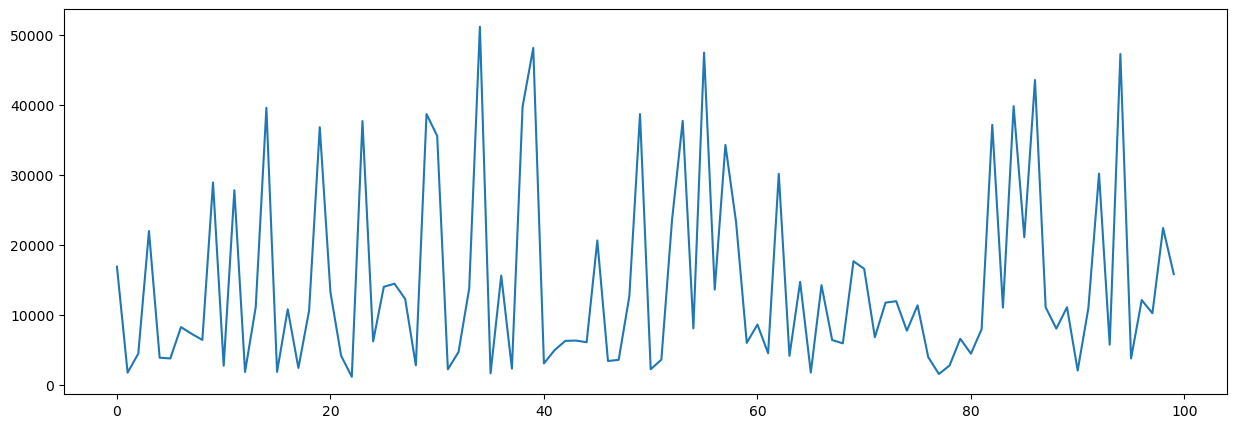

In [49]:
plt.figure(figsize=(15, 5))
# Create plot
plt.plot(newDf["charges"])

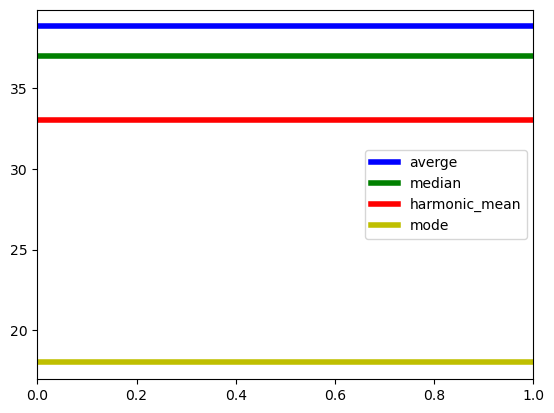

In [53]:
plt.axhline(np.nanmean(newDf.age),linewidth=4, color='b' ,label='averge')
plt.axhline(statistics.median(newDf.age),linewidth=4, color='g', label='median')
plt.axhline(statistics.harmonic_mean(newDf.age),linewidth=4, color='r',label='harmonic_mean')
plt.axhline(statistics.mode(newDf.age),linewidth=4, color='y',label='mode')
plt.legend()